In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import tensorflow as tf
from keras import layers,Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,concatenate, Dropout, BatchNormalization, Input, Reshape, Conv2D, MaxPooling2D, Flatten, Reshape, GlobalAveragePooling2D, SeparableConv2D,AveragePooling2D, add
from tensorflow.keras.backend import clear_session
from tensorflow.keras.optimizers import Adam

Using TensorFlow backend.


In [ ]:
pip install wfdb

     |████████████████████████████████| 112kB 2.8MB/s 
     |████████████████████████████████| 6.6MB 665kB/s 
     |████████████████████████████████| 163kB 28.6MB/s 


In [ ]:
!pip install pyedflib

     |████████████████████████████████| 1.1MB 2.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pyedflib: filename=pyEDFlib-0.1.18-cp36-cp36m-linux_x86_64.whl size=921164 sha256=2f16f49e080a7d3aac0be29f6c42f15ca933868ba5772eb0b621d7fa6491f56b
  Stored in directory: /root/.cache/pip/wheels/4c/16/32/829749d6ab56f64e81e44aed0b4b9a892c975512c15cc3edbb
Successfully built pyedflib


In [ ]:
pip install EMD-signal

     |████████████████████████████████| 51kB 4.2MB/s 
     |████████████████████████████████| 225kB 8.7MB/s 
     |████████████████████████████████| 112kB 40.9MB/s 
     |████████████████████████████████| 133kB 34.3MB/s 
  Created wheel for pathos: filename=pathos-0.2.6-cp36-none-any.whl size=77673 sha256=44d0cd200a97d06d81860807720f63d8ebab59951a3e11a76f487859fda1f941
  Stored in directory: /root/.cache/pip/wheels/3a/e8/c8/04cdd0c4bc6fbce35f642fc004244228916daae74bb0f482da
  Created wheel for ppft: filename=ppft-1.6.6.2-cp36-none-any.whl size=64743 sha256=667ce0f2921b78d503f783f2a5c2b66e852c7b3ba97b0f4c4b48410cb8fbfbb0
  Stored in directory: /root/.cache/pip/wheels/db/d2/2d/0ee21ede61786bb13247dbc69079373fd500c2bb0481913084
  Created wheel for pox: filename=pox-0.2.8-cp36-none-any.whl size=28290 sha256=7a5145ad88f36cd17cbae4f079074399980e3dc23f9527816d5d1654f7da1f0e
  Stored in directory: /root/.cache/pip/wheels/39/ed/ce/a93103746b327e18bffaeb99ba0d57a88b392f31d719cea700
Successfully 

In [ ]:
import wfdb
dbs = wfdb.get_dbs()

records_list = wfdb.io.get_record_list('chbmit',records='all')
records_list[:3]

['chb01/chb01_01.edf', 'chb01/chb01_02.edf', 'chb01/chb01_03.edf']

In [ ]:
for i in range(3):
  print(i,records_list[i])

0 chb01/chb01_01.edf
1 chb01/chb01_02.edf
2 chb01/chb01_03.edf


In [ ]:
import os
from urllib.request import urlretrieve

def get_content(part_code):
  url = "https://physionet.org/physiobank/database/chbmit/"+part_code+'/'+part_code+'-summary.txt'
  filename = "./chbmit.txt"

  urlretrieve(url,filename)

  # read the file into a list
  with open(filename, encoding='UTF-8') as f:
      # read all the document into a list of strings (each line a new string)
      content = f.readlines()
      os.remove(filename)
  
  return(content)

get_content('chb01')

['Data Sampling Rate: 256 Hz\n',
 '*************************\n',
 '\n',
 'Channels in EDF Files:\n',
 '**********************\n',
 'Channel 1: FP1-F7\n',
 'Channel 2: F7-T7\n',
 'Channel 3: T7-P7\n',
 'Channel 4: P7-O1\n',
 'Channel 5: FP1-F3\n',
 'Channel 6: F3-C3\n',
 'Channel 7: C3-P3\n',
 'Channel 8: P3-O1\n',
 'Channel 9: FP2-F4\n',
 'Channel 10: F4-C4\n',
 'Channel 11: C4-P4\n',
 'Channel 12: P4-O2\n',
 'Channel 13: FP2-F8\n',
 'Channel 14: F8-T8\n',
 'Channel 15: T8-P8\n',
 'Channel 16: P8-O2\n',
 'Channel 17: FZ-CZ\n',
 'Channel 18: CZ-PZ\n',
 'Channel 19: P7-T7\n',
 'Channel 20: T7-FT9\n',
 'Channel 21: FT9-FT10\n',
 'Channel 22: FT10-T8\n',
 'Channel 23: T8-P8\n',
 '\n',
 'File Name: chb01_01.edf\n',
 'File Start Time: 11:42:54\n',
 'File End Time: 12:42:54\n',
 'Number of Seizures in File: 0\n',
 '\n',
 'File Name: chb01_02.edf\n',
 'File Start Time: 12:42:57\n',
 'File End Time: 13:42:57\n',
 'Number of Seizures in File: 0\n',
 '\n',
 'File Name: chb01_03.edf\n',
 'File Sta

In [ ]:
part_codes = sorted(list(set([record.split('/')[0] for record in records_list])))
part_codes


['chb01',
 'chb02',
 'chb03',
 'chb04',
 'chb05',
 'chb06',
 'chb07',
 'chb08',
 'chb09',
 'chb10',
 'chb11',
 'chb12',
 'chb13',
 'chb14',
 'chb15',
 'chb16',
 'chb17',
 'chb18',
 'chb19',
 'chb20',
 'chb21',
 'chb22',
 'chb23',
 'chb24']

In [ ]:
print("here files with seizures: 3,4,15,16,18,21,26")

here files with seizures: 3,4,15,16,18,21,26


**dictionary** 
contains all information i.e. channels, start time , end time, seizure window for all seizure and non seizure files by help of summary file


In [ ]:
import re
part_info_dict = {}

def info_dict(content):
  
  line_nos=len(content)
  line_no=1

  channels = []
  file_name = []
  file_info_dict={}

  for line in content:

    # if there is Channel in the line...
    if re.findall('Channel \d+', line):
      # split the line into channel number and channel reference
      channel = line.split(': ')
      # get the channel reference and remove any new lines
      channel = channel[-1].replace("\n", "")
      # put into the channel list
      channels.append(channel)

    # if the line is the file name
    elif re.findall('File Name', line):
      # if there is already a file_name
      if file_name:
        # flush the current file info to it
        part_info_dict[file_name] = file_info_dict

      # get the file name
      file_name = re.findall('\w+\d+_\d+|\w+\d+\w+_\d+', line)[0]

      file_info_dict = {}
      # put the channel list in the file info dict and remove duplicates
      file_info_dict['Channels'] = list(set(channels))
      # reset the rest of the options
      file_info_dict['Start Time'] = ''
      file_info_dict['End Time'] = ''
      file_info_dict['Seizures Window'] = []

    # if the line is about the file start time
    elif re.findall('File Start Time', line):
      # get the start time
      file_info_dict['Start Time'] = re.findall('\d+:\d+:\d+', line)[0]

    # if the line is about the file end time
    elif re.findall('File End Time', line):
      # get the start time
      file_info_dict['End Time'] = re.findall('\d+:\d+:\d+', line)[0]

    elif re.findall('Seizure Start Time|Seizure End Time|Seizure \d+ Start Time|Seizure \d+ End Time', line):
      file_info_dict['Seizures Window'].append(int(re.findall('\d+', line)[-1]))

    # if last line in the list...
    if line_no == line_nos:
      # flush the file info to it
      part_info_dict[file_name] = file_info_dict

    line_no+=1
for part_code in part_codes:
  content = get_content(part_code)
  #print(content)
  info_dict(content)
#print(info_dict(content))
print(part_info_dict)
    

{'chb01_01': {'Channels': ['P8-O2', 'T7-P7', 'FP1-F3', 'P7-O1', 'F3-C3', 'CZ-PZ', 'F8-T8', 'P4-O2', 'T8-P8', 'C4-P4', 'T7-FT9', 'C3-P3', 'FZ-CZ', 'F7-T7', 'FP2-F4', 'FT9-FT10', 'FP2-F8', 'FP1-F7', 'P3-O1', 'P7-T7', 'FT10-T8', 'F4-C4'], 'Start Time': '11:42:54', 'End Time': '12:42:54', 'Seizures Window': []}, 'chb01_02': {'Channels': ['P8-O2', 'T7-P7', 'FP1-F3', 'P7-O1', 'F3-C3', 'CZ-PZ', 'F8-T8', 'P4-O2', 'T8-P8', 'C4-P4', 'T7-FT9', 'C3-P3', 'FZ-CZ', 'F7-T7', 'FP2-F4', 'FT9-FT10', 'FP2-F8', 'FP1-F7', 'P3-O1', 'P7-T7', 'FT10-T8', 'F4-C4'], 'Start Time': '12:42:57', 'End Time': '13:42:57', 'Seizures Window': []}, 'chb01_03': {'Channels': ['P8-O2', 'T7-P7', 'FP1-F3', 'P7-O1', 'F3-C3', 'CZ-PZ', 'F8-T8', 'P4-O2', 'T8-P8', 'C4-P4', 'T7-FT9', 'C3-P3', 'FZ-CZ', 'F7-T7', 'FP2-F4', 'FT9-FT10', 'FP2-F8', 'FP1-F7', 'P3-O1', 'P7-T7', 'FT10-T8', 'F4-C4'], 'Start Time': '13:43:04', 'End Time': '14:43:04', 'Seizures Window': [2996, 3036]}, 'chb01_04': {'Channels': ['P8-O2', 'T7-P7', 'FP1-F3', 'P7-O1',

In [ ]:
print(part_info_dict['chb01_01'])

{'Channels': ['P8-O2', 'T7-P7', 'FP1-F3', 'P7-O1', 'F3-C3', 'CZ-PZ', 'F8-T8', 'P4-O2', 'T8-P8', 'C4-P4', 'T7-FT9', 'C3-P3', 'FZ-CZ', 'F7-T7', 'FP2-F4', 'FT9-FT10', 'FP2-F8', 'FP1-F7', 'P3-O1', 'P7-T7', 'FT10-T8', 'F4-C4'], 'Start Time': '11:42:54', 'End Time': '12:42:54', 'Seizures Window': []}


In [ ]:
print(part_info_dict['chb01_03']['Seizures Window'])

[2996, 3036]


**seizure list**

In [ ]:
files_with_seizures = []
for file_id in part_info_dict:
    # if there is something in the seizure window
    if part_info_dict[file_id]['Seizures Window']:
        files_with_seizures.append(file_id)
print(files_with_seizures)
files_with_seizures.remove('chb02_16')
print(files_with_seizures)
print(files_with_seizures[0:5])

['chb01_03', 'chb01_04', 'chb01_15', 'chb01_16', 'chb01_18', 'chb01_21', 'chb01_26', 'chb02_16', 'chb02_19', 'chb03_01', 'chb03_02', 'chb03_03', 'chb03_04', 'chb03_34', 'chb03_35', 'chb03_36', 'chb04_05', 'chb04_08', 'chb04_28', 'chb05_06', 'chb05_13', 'chb05_16', 'chb05_17', 'chb05_22', 'chb06_01', 'chb06_04', 'chb06_09', 'chb06_10', 'chb06_13', 'chb06_18', 'chb06_24', 'chb07_12', 'chb07_13', 'chb07_19', 'chb08_02', 'chb08_05', 'chb08_11', 'chb08_13', 'chb08_21', 'chb09_06', 'chb09_08', 'chb09_19', 'chb10_12', 'chb10_20', 'chb10_27', 'chb10_30', 'chb10_31', 'chb10_38', 'chb10_89', 'chb11_82', 'chb11_92', 'chb11_99', 'chb12_06', 'chb12_08', 'chb12_09', 'chb12_10', 'chb12_11', 'chb12_23', 'chb12_27', 'chb12_28', 'chb12_29', 'chb12_33', 'chb12_36', 'chb12_38', 'chb12_42', 'chb13_19', 'chb13_21', 'chb13_40', 'chb13_55', 'chb13_58', 'chb13_59', 'chb13_60', 'chb13_62', 'chb14_03', 'chb14_04', 'chb14_06', 'chb14_11', 'chb14_17', 'chb14_18', 'chb14_27', 'chb15_06', 'chb15_10', 'chb15_15', 'ch

In [ ]:
s=files_with_seizures[0:5]
print(s[0][0:5])

chb01


**non-seizure list**

In [ ]:
files_with_nonseizures = []
for file_id in part_info_dict:
    # if there is nothing in the seizure window
    if not part_info_dict[file_id]['Seizures Window']:
        files_with_nonseizures.append(file_id)
print(files_with_nonseizures)

['chb01_01', 'chb01_02', 'chb01_05', 'chb01_06', 'chb01_07', 'chb01_08', 'chb01_09', 'chb01_10', 'chb01_11', 'chb01_12', 'chb01_13', 'chb01_14', 'chb01_17', 'chb01_19', 'chb01_20', 'chb01_22', 'chb01_23', 'chb01_24', 'chb01_25', 'chb01_27', 'chb01_29', 'chb01_30', 'chb01_31', 'chb01_32', 'chb01_33', 'chb01_34', 'chb01_36', 'chb01_37', 'chb01_38', 'chb01_39', 'chb01_40', 'chb01_41', 'chb01_42', 'chb01_43', 'chb01_46', 'chb02_01', 'chb02_02', 'chb02_03', 'chb02_04', 'chb02_05', 'chb02_06', 'chb02_07', 'chb02_08', 'chb02_09', 'chb02_10', 'chb02_11', 'chb02_12', 'chb02_13', 'chb02_14', 'chb02_15', 'chb02_17', 'chb02_18', 'chb02_20', 'chb02_21', 'chb02_22', 'chb02_23', 'chb02_24', 'chb02_25', 'chb02_26', 'chb02_27', 'chb02_28', 'chb02_29', 'chb02_30', 'chb02_31', 'chb02_32', 'chb02_33', 'chb02_34', 'chb02_35', 'chb03_05', 'chb03_06', 'chb03_07', 'chb03_08', 'chb03_09', 'chb03_10', 'chb03_11', 'chb03_12', 'chb03_13', 'chb03_14', 'chb03_15', 'chb03_16', 'chb03_17', 'chb03_18', 'chb03_19', 'ch

In [ ]:
print(len(files_with_seizures))
print(len(files_with_nonseizures))

139
535


In [ ]:
%%time
import pandas as pd
import numpy as np
import pyedflib

def data_load(file):

  try: 
    url = "https://physionet.org/physiobank/database/chbmit/"+file
    filename = "./chbmit.edf"

    urlretrieve(url,filename)
    # use the reader to get an EdfReader file
    f = pyedflib.EdfReader(filename)
    os.remove(filename)
    
    # get a list of the EEG channels
    selected_channels=['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1','FP1-F3','F3-C3','C3-P3','P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8' ,'T8-P8' ,'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8','T8-P8']
    # get the names of the signals
    channel_names = f.getSignalLabels()
    # get the sampling frequencies of each signal
    channel_freq = f.getSampleFrequencies()

    # make an empty file of 0's
    sigbufs = np.zeros((f.getNSamples()[0],len(selected_channels)))
    # for each of the channels in the selected channels
    for i, channel in enumerate(selected_channels):
      # add the channel data into the array
      sigbufs[:, i] = f.readSignal(channel_names.index(channel))
    
    # turn to a pandas df and save a little space
    df = pd.DataFrame(sigbufs, columns = selected_channels).astype('float32')
    
    # get equally increasing numbers upto the length of the data depending
    # on the length of the data divided by the sampling frequency
    index_increase = np.linspace(0,
                                 len(df)/channel_freq[0],
                                 len(df), endpoint=False)

    # round these to the lowest nearest decimal to get the seconds
    seconds = np.floor(index_increase).astype('uint16')

    # make a column the timestamp
    df['Time'] = seconds

    # make the time stamp the index
    df = df.set_index('Time')

    # name the columns as channel
    df.columns.name = 'Channel'

    return df

  except:
    OSError
    return pd.DataFrame(), None
raw_data = data_load(records_list[17])
display(raw_data)


Channel,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,C4-P4,P4-O2,FP2-F8,F8-T8,T8-P8,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8
Time,,,,,,,,,,,,,,,,,,,,,,,
0,35.360195,63.492062,-6.837607,16.214897,51.770451,11.916972,8.791209,35.750916,50.598289,25.982906,-116.630035,-75.213676,-28.717949,104.908424,0.976801,-192.429794,-44.346764,18.949940,7.228327,-161.953598,13.479854,102.564102,0.976801
0,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360
0,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,-0.195360,0.195360,0.195360,0.195360,0.195360,-0.586081,0.195360,-0.195360,0.195360,0.195360,0.195360,0.195360,0.195360
0,-0.195360,0.586081,0.195360,0.195360,0.195360,0.195360,-0.195360,0.195360,0.195360,0.195360,-3.711844,-2.930403,-1.758242,2.148962,-0.195360,-6.837607,-0.586081,-1.758242,0.195360,-1.758242,0.976801,2.148962,-0.195360
0,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,1.367521,-1.758242,0.195360,0.195360,0.195360,-0.195360,0.586081,1.758242,0.195360,0.586081,-0.195360,-0.195360,0.195360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3599,-25.592186,5.274725,15.433455,-19.340660,-5.665446,8.009768,-11.135531,-14.652015,-31.843712,57.240536,-0.586081,-21.684982,-15.042735,71.697189,-44.346764,-8.791209,44.346764,-22.466423,-15.042735,-36.923077,46.691086,65.836388,-44.346764
3599,-19.340660,11.135531,15.433455,-24.810745,0.586081,16.214897,-11.135531,-22.466423,-27.545788,67.399269,4.102564,-75.213676,-11.135531,77.167274,-39.658119,-56.459095,50.989010,-20.512821,-15.042735,-35.750916,45.128204,66.227104,-39.658119
3599,-12.698413,16.605618,9.181930,-23.638584,6.056166,22.857143,-16.214897,-22.857143,-24.420025,73.650795,-3.711844,-100.610504,-9.963370,79.120880,-36.532356,-87.326004,55.677654,-18.949940,-8.791209,-35.360195,38.485958,68.571426,-36.532356


CPU times: user 2.14 s, sys: 507 ms, total: 2.65 s
Wall time: 6.93 s


In [ ]:
#[FP1-F7, F7-T7, T7-P7, P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1, FP2-F4, F4-C4, C4-P4, P4-O2, FP2-F8, F8-T8 ,T8-P8 ,P8-O2, FZ-CZ, CZ-PZ, P7-T7, T7-FT9, FT9-FT10, FT10-T8,T8-P8]

**Mne visualisation**

Creating RawArray with float64 data, n_channels=23, n_times=921600
    Range : 0 ... 921599 =      0.000 ...  3599.996 secs
Ready.


<ipython-input-20-7b78300a600b>:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  ch_types=['eeg']*data.shape[-1])


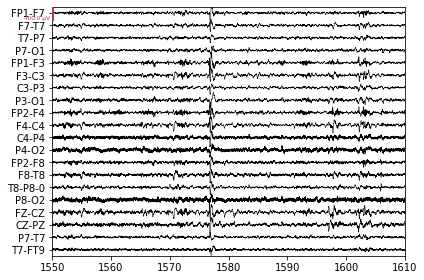

In [ ]:
freqq=256
import mne

def mne_object(data, freq):
  # create an mne info file with meta data about the EEG
  info = mne.create_info(ch_names=list(data.columns), 
                         sfreq=freq, 
                         ch_types=['eeg']*data.shape[-1])
  
  # data needs to be in volts rather than in microvolts
  data = data.apply(lambda x: x*1e-6)
  # transpose the data
  data_T = data.transpose()
  
  # create raw mne object
  raw = mne.io.RawArray(data_T, info)

  return raw

chb_mne = mne_object(raw_data,freqq)

plot = chb_mne.plot(scalings = dict(eeg=20e-5),
                    start = 1550,
                    duration = 60,
                    show =True,
                    show_scrollbars=False)

In [ ]:
records_list[2]

'chb01/chb01_03.edf'

In [ ]:
s=files_with_seizures[4]
raw_data1=data_load(s[0:5]+'/'+s+'.edf')
x=raw_data1.iloc[part_info_dict[s]['Seizures Window'][0]*256:part_info_dict[s]['Seizures Window'][1]*256]



In [ ]:
x

Channel,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,C4-P4,P4-O2,FP2-F8,F8-T8,T8-P8,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8
Time,,,,,,,,,,,,,,,,,,,,,,,
1720,63.101341,38.095238,-9.181930,-80.293037,10.354091,49.426128,-9.181930,-39.267399,-110.769234,59.975578,21.294262,9.963370,-52.942612,2.539683,23.638584,6.837607,-8.400489,-18.168499,9.572650,0.195360,-103.736267,-56.849815,23.638584
1720,69.743591,37.704517,-4.493285,-83.028084,25.592186,53.333332,-15.433455,-44.346764,-89.279610,58.803417,10.744811,-10.354091,-36.923077,4.884005,21.684982,-20.512821,-6.446887,-24.810745,4.884005,-0.976801,-81.074478,-54.896214,21.684982
1720,73.650795,38.485958,-0.976801,-88.498169,46.691086,50.989010,-23.638584,-52.161171,-62.319901,52.942612,-15.042735,-36.923077,-24.029305,11.916972,16.996338,-67.008545,-9.181930,-39.267399,1.367521,-6.837607,-57.240536,-45.128204,16.996338
1720,78.730156,31.452991,1.758242,-90.451767,72.869354,42.002441,-36.141636,-56.849815,-34.969475,42.783882,-31.843712,-12.698413,-3.321123,6.446887,12.698413,-53.724052,-12.307693,-50.207569,-1.367521,-4.493285,-39.658119,-41.221001,12.698413
1720,83.809525,23.638584,4.102564,-90.451767,101.782661,29.108669,-47.081806,-61.929180,-10.744811,32.234432,-31.843712,-4.884005,16.605618,-2.148962,11.135531,-42.783882,-20.512821,-58.412697,-3.711844,-0.586081,-24.420025,-41.221001,11.135531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,140.463974,63.882782,36.923077,-51.379730,77.167274,81.465202,48.644688,-16.996338,-4.884005,58.803417,108.034187,89.279610,-36.923077,70.525032,132.258850,86.544563,67.008545,84.981682,-36.532356,-76.385834,-174.847382,43.565323,132.258850
1809,120.537239,71.697189,31.452991,-54.896214,64.664223,84.590965,43.956043,-25.201466,-10.744811,58.803417,101.001221,77.167274,-45.128204,74.822952,125.225883,71.306473,68.180710,83.028084,-31.062271,-72.869354,-165.860809,42.002441,125.225883
1809,106.862030,64.273506,22.075703,-60.757019,58.412697,75.995117,33.406593,-35.750916,-13.479854,54.505493,118.192917,33.797314,-45.518925,72.087914,113.504272,54.114773,63.101341,77.167274,-21.684982,-58.803417,-166.251526,35.360195,113.504272


In [ ]:
import pandas as pd
import pywt
import numpy as np
from scipy.signal import butter,filtfilt
from scipy import stats


def butter_filter(data,low,high):
  b,a=butter(2,[low/128,high/128],btype='band')
  y=filtfilt(b,a,data,axis=0)
  return y

**seizure array for training**

In [25]:
import numpy as np 
unwanted_channels = {'chb12_27','chb12_28','chb12_29','chb13_40','chb16_18','chb24_15'}   
files_with_seizures = [ele for ele in files_with_seizures if ele not in unwanted_channels]
#files_with_seizures.remove('chb12_27') 
s_array = np.zeros((90,15360,23), dtype=np.float32)
#files_with_multiseizures=[]
for i in range(90):
  s=files_with_seizures[i]
  print(i,s)
  raw_data=data_load(s[0:5]+'/'+s+'.edf')
  k=raw_data.iloc[part_info_dict[s]['Seizures Window'][0]*256:(part_info_dict[s]['Seizures Window'][0]+60)*256]
  k=k.to_numpy()
  #y=butter_filter(k,0.5,70)
  s_array[i] = k

  #if(len(part_info_dict[s]['Seizures Window'])>2):
    #files_with_multiseizures.append(s)


0 chb01_03
1 chb01_04
2 chb01_15
3 chb01_16
4 chb01_18
5 chb01_21
6 chb01_26
7 chb02_19
8 chb03_01
9 chb03_02
10 chb03_03
11 chb03_04
12 chb03_34
13 chb03_35
14 chb03_36
15 chb04_05
16 chb04_08
17 chb04_28
18 chb05_06
19 chb05_13
20 chb05_16
21 chb05_17
22 chb05_22
23 chb06_01
24 chb06_04
25 chb06_09
26 chb06_10
27 chb06_13
28 chb06_18
29 chb06_24
30 chb07_12
31 chb07_13
32 chb07_19
33 chb08_02
34 chb08_05
35 chb08_11
36 chb08_13
37 chb08_21
38 chb09_06
39 chb09_08
40 chb09_19
41 chb10_12
42 chb10_20
43 chb10_27
44 chb10_30
45 chb10_31
46 chb10_38
47 chb10_89
48 chb11_82
49 chb11_92
50 chb11_99
51 chb12_06
52 chb12_08
53 chb12_09
54 chb12_10
55 chb12_11
56 chb12_23
57 chb12_33
58 chb12_36
59 chb12_38
60 chb12_42
61 chb13_19
62 chb13_21
63 chb13_55
64 chb13_58
65 chb13_59
66 chb13_60
67 chb13_62
68 chb14_03
69 chb14_04
70 chb14_06
71 chb14_11
72 chb14_17
73 chb14_18
74 chb14_27
75 chb15_06
76 chb15_10
77 chb15_15
78 chb15_17
79 chb15_20
80 chb15_22
81 chb15_28
82 chb15_31
83 chb15_40
84

In [26]:
#print(len(files_with_multiseizures))

In [27]:
"""ms_array = np.zeros((70,15360,23), dtype=np.float32)
l=0
for i in range(25):
  s=files_with_multiseizures[i]
  print(s)
  raw_data=data_load(s[0:5]+'/'+s+'.edf')
  ms=int(len(part_info_dict[s]['Seizures Window'])/2)
  print(ms)
  j=0
  for j in range(ms):
    print(s)
    k=raw_data.iloc[part_info_dict[s]['Seizures Window'][j+2]*256:(part_info_dict[s]['Seizures Window'][j+2]+60)*256]
    j+=2
    k=k.to_numpy()
    ms_array[l] = k
    l+=1"""

"ms_array = np.zeros((70,15360,23), dtype=np.float32)\nl=0\nfor i in range(25):\n  s=files_with_multiseizures[i]\n  print(s)\n  raw_data=data_load(s[0:5]+'/'+s+'.edf')\n  ms=int(len(part_info_dict[s]['Seizures Window'])/2)\n  print(ms)\n  j=0\n  for j in range(ms):\n    print(s)\n    k=raw_data.iloc[part_info_dict[s]['Seizures Window'][j+2]*256:(part_info_dict[s]['Seizures Window'][j+2]+60)*256]\n    j+=2\n    k=k.to_numpy()\n    ms_array[l] = k\n    l+=1"

In [28]:
s_array.shape
#s_array

(90, 15360, 23)

In [29]:
def normalisation(y):
  y=(y-np.mean(y))/(np.max(y)-np.min(y))
  return y

In [30]:
NonSeizures_Window=[]
import random
#random.seed(12)
for i in range(100):
  b=random.randint(0,300)     #b will give starting random time
  NonSeizures_Window.append(b)
NonSeizures_Window

[276,
 54,
 125,
 264,
 206,
 273,
 175,
 267,
 16,
 62,
 232,
 194,
 103,
 97,
 205,
 92,
 269,
 22,
 125,
 150,
 126,
 290,
 61,
 29,
 184,
 80,
 26,
 96,
 159,
 217,
 277,
 59,
 70,
 17,
 170,
 32,
 88,
 101,
 22,
 284,
 284,
 4,
 68,
 84,
 25,
 294,
 275,
 44,
 133,
 269,
 267,
 44,
 79,
 126,
 243,
 197,
 282,
 185,
 52,
 219,
 66,
 59,
 189,
 179,
 145,
 59,
 2,
 130,
 96,
 215,
 78,
 131,
 90,
 152,
 212,
 181,
 7,
 128,
 187,
 125,
 26,
 148,
 36,
 120,
 15,
 202,
 111,
 248,
 22,
 130,
 246,
 252,
 16,
 9,
 232,
 230,
 277,
 194,
 34,
 190]

In [31]:
import random
random.seed(42)
unwanted_channel = {'chb15_01','chb19_01','chb18_01','chb16_19','chb17c_13','chb01_27','chb13_38','chb13_39','chb13_47','chb13_10','chb13_08','chb13_07','chb13_11','chb13_12','chb13_04','chb13_05','chb13_06','chb13_02', 'chb13_03', 'chb13_09', 'chb13_13', 'chb13_14', 'chb13_15', 'chb13_16', 'chb13_18', 'chb13_22', 'chb13_24', 'chb13_30', 'chb13_36', 'chb13_37', 'chb13_56'}   
files_with_nonseizures = [ele for ele in files_with_nonseizures if ele not in unwanted_channel]
shuffled=files_with_nonseizures[0:400]
random.shuffle(shuffled)

print(len(files_with_nonseizures))
#print(shuffled)

#shuffled.remove('chb01_27')  #contains ecg channel as well
print(len(shuffled))
#print(files_with_nonseizures[290:320])

504
400


**non-seizure array for training**

In [32]:
ns_array = np.zeros((90,15360,23), dtype=np.float32)
for i in range(90):
  ns=shuffled[i]
  #ns=files_with_nonseizures[i]
  raw_data=data_load(ns[0:5]+'/'+ns+'.edf')
  print(i,ns)
  k1=raw_data.iloc[NonSeizures_Window[i]*256:(NonSeizures_Window[i]+60)*256]
  #print(k1)
  import numpy as np 
  k1=k1.to_numpy()
  #y1=butter_filter(k1,0.5,70)
  ns_array[i] = k1



0 chb11_03
1 chb03_32
2 chb05_27
3 chb05_33
4 chb10_28
5 chb09_18
6 chb07_09
7 chb04_29
8 chb11_11
9 chb14_07
10 chb07_11
11 chb14_32
12 chb02_05
13 chb16_05
14 chb17a_06
15 chb18_03
16 chb02_10
17 chb09_05
18 chb04_02
19 chb02_22
20 chb11_54
21 chb05_38
22 chb11_05
23 chb03_15
24 chb01_12
25 chb03_06
26 chb08_03
27 chb01_05
28 chb18_06
29 chb18_11
30 chb11_13
31 chb11_07
32 chb10_21
33 chb08_22
34 chb02_24
35 chb02_01
36 chb17b_68
37 chb12_20
38 chb02_28
39 chb10_19
40 chb18_25
41 chb12_41
42 chb10_02
43 chb18_19
44 chb01_40
45 chb15_51
46 chb10_16
47 chb03_38
48 chb15_26
49 chb05_08
50 chb06_07
51 chb02_35
52 chb17b_59
53 chb02_12
54 chb09_17
55 chb05_09
56 chb09_01
57 chb03_13
58 chb18_13
59 chb16_02
60 chb03_26
61 chb18_24
62 chb01_37
63 chb03_10
64 chb06_16
65 chb01_42
66 chb15_33
67 chb04_37
68 chb04_34
69 chb04_30
70 chb11_02
71 chb15_63
72 chb01_13
73 chb02_34
74 chb16_15
75 chb17b_57
76 chb12_34
77 chb02_33
78 chb05_31
79 chb03_23
80 chb05_23
81 chb04_26
82 chb15_50
83 chb09_1

In [33]:
ns_array.shape

(90, 15360, 23)

**train x**

In [34]:
result = np.concatenate((s_array,ns_array),axis=0)

In [35]:
result.shape

(180, 15360, 23)

In [36]:
result

array([[[  57.240536 ,   45.909645 ,   55.677654 , ...,   24.810745 ,
            6.4468865,   32.625153 ],
        [  53.333332 ,   50.98901  ,   56.459095 , ...,   36.923077 ,
            9.18193  ,   21.294262 ],
        [  45.909645 ,   59.194138 ,   54.896214 , ...,   54.896214 ,
           12.698413 ,   10.744811 ],
        ...,
        [  -8.0097685,   -2.930403 ,   17.777779 , ...,  339.34067  ,
         -138.51038  ,  -88.49817  ],
        [ -11.526252 ,   18.168499 ,   -7.2283273, ...,  336.99634  ,
         -145.15262  ,  -85.372406 ],
        [ -11.916972 ,   15.824176 ,  -19.34066  , ...,  323.32114  ,
         -151.40414  ,  -88.107445 ]],

       [[ -66.61783  ,  -21.294262 ,  -65.44566  , ...,  -45.128204 ,
          -99.04762  ,   76.77656  ],
        [ -56.849815 ,  -16.996338 ,  -63.10134  , ...,  -25.201466 ,
          -86.93529  ,   27.936508 ],
        [ -49.42613  ,  -15.824176 ,  -63.882782 , ...,  -44.737484 ,
          -56.068375 ,    4.4932847],
        ...,


In [37]:
import keras
train_x = result.reshape(180, 15360, 23,1)
#train_x = keras.utils.normalize(train_x, axis=1)

**train_y**

In [38]:
ys=np.ones(90)
yns=np.zeros(90)
train_y=np.concatenate((ys,yns),axis=0)

In [39]:
train_y.shape

(180,)

# **preparation of test samples**

In [40]:
nst_array = np.zeros((30,15360,23), dtype=np.float32)
shuffledt=files_with_nonseizures[400:500]
random.shuffle(shuffledt)
for i in range(30):  
  ns=shuffledt[i]
  raw_data=data_load(ns[0:5]+'/'+ns+'.edf')
  print(ns)
  k1=raw_data.iloc[NonSeizures_Window[i]*256:(NonSeizures_Window[i]+60)*256]
  #print(k1)
  import numpy as np 
  k1=k1.to_numpy()
  #y1=butter_filter(k1,0.5,70)
  nst_array[i] = k1


chb19_13
chb21_12
chb21_01
chb20_06
chb21_18
chb20_30
chb21_03
chb21_27
chb22_06
chb21_13
chb22_21
chb21_30
chb22_03
chb19_23
chb20_34
chb22_77
chb22_04
chb21_31
chb22_19
chb20_31
chb19_18
chb20_60
chb20_28
chb22_16
chb21_29
chb22_26
chb20_21
chb19_17
chb20_17
chb20_08


In [41]:
print("seizure test file")
import numpy as np 
st_array = np.zeros((20,15360,23), dtype=np.float32)
for i in range(100,120):
  s=files_with_seizures[i]
  print(s)
  raw_data=data_load(s[0:5]+'/'+s+'.edf')
  k=raw_data.iloc[part_info_dict[s]['Seizures Window'][0]*256:(part_info_dict[s]['Seizures Window'][0]+60)*256]
  k=k.to_numpy()
  #y=butter_filter(k,0.5,70)
  st_array[i-100] = k

seizure test file
chb18_32
chb18_35
chb18_36
chb19_28
chb19_29
chb19_30
chb20_12
chb20_13
chb20_14
chb20_15
chb20_16
chb20_68
chb21_19
chb21_20
chb21_21
chb21_22
chb22_20
chb22_25
chb22_38
chb23_06


In [42]:
result1 = np.concatenate((st_array,nst_array),axis=0)
result1.shape

(50, 15360, 23)

In [43]:
test_x = result1.reshape(50, 15360, 23,1)

In [44]:
yst=np.ones(20)
ynst=np.zeros(30)


In [45]:
test_y=np.concatenate((yst,ynst),axis=0)
test_y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [46]:
#Sequential Model 

**adding of conv0 layer (7*7) with bn,relu,pool**





In [70]:
model = Sequential()
        
model.add(Conv2D(filters=64,
                    kernel_size=7,strides=2,
                    padding="same",input_shape=(15360, 23,1),name='conv0'))
  
model.add(BatchNormalization())
model.add(Activation('relu',name='relu0'))

model.add(MaxPooling2D(pool_size=2, strides=2,padding="same",name='pool0'))

In [71]:
convs=[]
#parallel layers
for i in range (1):     
    #k=6
    #DENSE BLOCK
    for i in range (1):         
    
        
        #DENSE LAYER

        for filters in (64,128,128,128,256,256,256,512,512):            
            model.add(Conv2D(filters,
                    kernel_size=1,
                    padding="same"))
            #model.add(BatchNormalization())
            #model.add(Activation('relu'))
            model.add(Conv2D(filters,
                    kernel_size=3,
                    padding="same"))
            model.add(BatchNormalization())
            model.add(Activation('relu'))
            model.add(AveragePooling2D(pool_size=2,padding="same"))
        
        
        #TRANSITION LAYER: 

        for i in range (1):
            model.add(Conv2D(filters=512,
                    kernel_size=1,
                    padding="same"))
            model.add(BatchNormalization())
            model.add(Activation('relu'))
        
            model.add(AveragePooling2D(pool_size=2,padding="same"))

        #increasing of dense layer(k+=6 by 6 layer in next dense block)
        #k+=6 

        
        

    #pool=(MaxPooling2D(pool_size=3))(model)
    print("layer")

    #appending of all parallel layers:

    convs.append(model)

        
#merged=layers.concatenate(convs,axis=1)

layer


**Adding of 5 parallel layers with convs append**

---




In [72]:
model.add(Flatten())


**flattening of layers and addind dense and dropout layers**

In [73]:
model.add(Dense(units=1024,
                  activation='relu'))
#model.add(GaussianNoise(0.1))

model.add(Dropout(0.2,name='drop0'))

model.add(Dense(units=512,
                  activation='relu'))

model.add(Dropout(0.2,name='drop1'))

#model.add(Dense(units=100, activation='relu'))

#model.add(Dropout(0.2,name='drop2'))

#model.add(Dense(units=25, activation='relu'))

model.add(Dense(units=1,
                  activation='sigmoid'))
  


In [74]:
#from tensorflow.keras.optimizers import SGD

**compilation of model**

In [75]:
model.compile(optimizer=Adam(0.001),
                loss='binary_crossentropy',
                metrics=['accuracy', 'AUC', 'Recall', 'Precision'])

**model summary**

In [76]:
clear_session()
# Create a basic model instance
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv0 (Conv2D)               (None, 7680, 12, 64)      3200      
_________________________________________________________________
batch_normalization (BatchNo (None, 7680, 12, 64)      256       
_________________________________________________________________
relu0 (Activation)           (None, 7680, 12, 64)      0         
_________________________________________________________________
pool0 (MaxPooling2D)         (None, 3840, 6, 64)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 3840, 6, 64)       4160      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3840, 6, 64)       36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 3840, 6, 64)       2

**Training and validation sets**

In [77]:
from sklearn.model_selection import train_test_split
train_X,val_X,train_Y,val_Y=train_test_split(train_x,train_y,test_size=0.25)

In [78]:
EPOCHS=40


In [79]:
#callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)

In [80]:
history = model.fit(train_x, 
                    train_y,
                    batch_size=16, 
                    epochs=EPOCHS,
                    validation_data = (val_X, val_Y)
                    )
                    #callbacks=[callback]
                    #verbose=1)

Epoch 1/40
12/12 [==============================] - 2s 147ms/step - loss: 0.8871 - accuracy: 0.6111 - auc: 0.6581 - recall: 0.5667 - precision: 0.6220 - val_loss: 84.0749 - val_accuracy: 0.5111 - val_auc: 0.5000 - val_recall: 0.0435 - val_precision: 1.0000
Epoch 2/40
12/12 [==============================] - 1s 90ms/step - loss: 0.7747 - accuracy: 0.6389 - auc: 0.6698 - recall: 0.6000 - precision: 0.6506 - val_loss: 1376.6332 - val_accuracy: 0.5111 - val_auc: 0.5000 - val_recall: 1.0000 - val_precision: 0.5111
Epoch 3/40
12/12 [==============================] - 1s 91ms/step - loss: 0.7929 - accuracy: 0.6944 - auc: 0.7319 - recall: 0.6111 - precision: 0.7333 - val_loss: 60.0793 - val_accuracy: 0.5333 - val_auc: 0.4872 - val_recall: 0.3478 - val_precision: 0.5714
Epoch 4/40
12/12 [==============================] - 1s 90ms/step - loss: 0.6367 - accuracy: 0.6833 - auc: 0.7374 - recall: 0.6778 - precision: 0.6854 - val_loss: 208.3362 - val_accuracy: 0.5556 - val_auc: 0.5455 - val_recall: 1.0

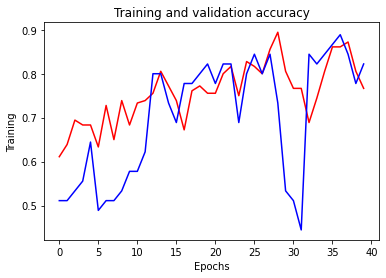

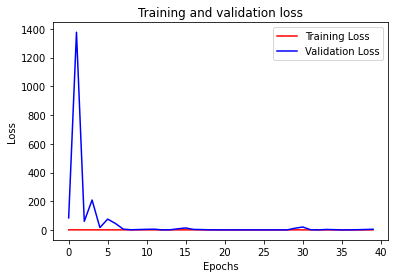

In [81]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc,'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Training')

plt.figure()

plt.plot(epochs, loss, 'r' ,label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
from google.colab import files
plt.savefig("abc2.png")
#files.download("abc2.png") 
plt.show()

In [82]:
pred=model.predict(test_x)
Y_pred=pred.round()
Y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [83]:
from sklearn.metrics import accuracy_score
a=accuracy_score(test_y,Y_pred)
print(a*100)

80.0


**Confusion Matrix**

In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y,Y_pred)
print(cm)

[[23  7]
 [ 3 17]]


In [85]:
confusion_df = pd.DataFrame(cm)
labels_dict = {
    0: 'non-seizure',
    1: 'seizure'}
confusion_df = confusion_df.rename(columns=labels_dict)
confusion_df.index = confusion_df.columns
confusion_df


,non-seizure,seizure
non-seizure,23,7
seizure,3,17


In [86]:
#"valid" padding option is: model.output_shape = (input_shape - pool_size + 1) / strides)

#"same" padding option is: model.output_shape = input_shape / strides

In [87]:
# accuracy: (tp + tn) / (p + n)
# precision tp / (tp + fp)
# recall: tp / (tp + fn)
# f1: 2 tp / (2 tp + fp + fn)


**ACCURACY , F1 , PRECISION,REACALL SCORE**

In [88]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

accuracy = accuracy_score(test_y,Y_pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(test_y,Y_pred)
print('Precision: %f' % precision)

recall = recall_score(test_y,Y_pred)
print('Recall: %f' % recall)

f1 = f1_score(test_y,Y_pred)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(test_y,Y_pred)
print('ROC AUC: %f' % auc)

Accuracy: 0.800000
Precision: 0.708333
Recall: 0.850000
F1 score: 0.772727
ROC AUC: 0.808333


**ROC-CURVE** 

In [90]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,Y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8083333333333332

No handles with labels found to put in legend.


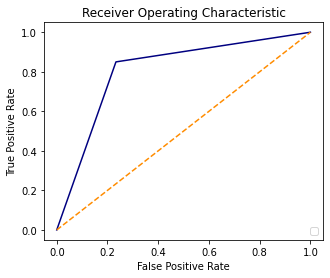

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='navy')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],color='darkorange',linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
from google.colab import files
plt.savefig("32.png")
#files.download("32.png") 
plt.show()